# Customer Complaints Classification

### Pujan Malavia

In [ ]:
from IPython.display import display
from PIL import Image
path= "C:/Users/puj83/OneDrive/Portfolio/Complaints/cfpb.png"
display(Image.open(path))

### Link to Dataset:
https://catalog.data.gov/dataset/consumer-complaint-database

### Abstract:
Each week the American Consumer Financial Protection Bureau (CFPB) sends thousands of consumers’ complaints about financial products and services to companies for response. Those complaints are published here CFPB after the company responds or after 15 days. By adding their voice, consumers help improve the financial marketplace get their voices heard.

https://www.kaggle.com/cfpb/us-consumer-finance-complaints

https://www.consumerfinance.gov/

### Industry:
Government Administration/Financial Services

### Company Information:
The Consumer Financial Protection Bureau (CFPB) is an agency of the United States government responsible for consumer protection in the financial sector. CFPB's jurisdiction includes banks, credit unions, securities firms, payday lenders, mortgage-servicing operations, foreclosure relief services, debt collectors and other financial companies operating in the United States.

https://en.wikipedia.org/wiki/Consumer_Financial_Protection_Bureau
https://www.consumerfinance.gov/

### Tool:
Python (Jupyter Notebook)

### Use Case:

Building a model to predict consumer disputation rate

### Initial Dataset(s):

Consumer Complaints Class 

### Data:

The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily.

### Data Fields:

Date received

Product

Sub-product

Issue

Sub-issue

Consumer complaint narrative

Company public response

Company

State

ZIP code

Tags

Consumer consent provided?

Submitted via

Date sent to company

Company response to consumer

Timely response?

Consumer disputed?

Complaint ID


In [ ]:
# !pip install matplotlib.pyplot
# !pip install scikit-plot

### Importing Libraries

In [55]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt
%matplotlib inline

### Importing Dataset(s) 

In [56]:
# Read dataframe into Jupyter
df = pd.read_csv('C:/Users/puj83/OneDrive/Portfolio/Complaints/complaints.csv')
df = df[df['Consumer disputed?'].notnull()]

In [57]:
df.head(15).T

,175,256,289,407,556,632,740,953,1013,1066,1230,1692,1929,2696,3386
Date received,2016-07-13,2017-04-13,2016-06-29,2015-05-20,2016-01-15,2016-10-17,2016-09-20,2015-12-04,2016-07-14,2016-08-22,2015-04-06,2016-05-12,2016-12-22,2016-06-13,2016-08-21
Product,Debt collection,Credit card,Debt collection,Debt collection,Bank account or service,Debt collection,Debt collection,Consumer Loan,Debt collection,Consumer Loan,Debt collection,Credit card,Credit card,Debt collection,Debt collection
Sub-product,I do not know,NaN,Credit card,Payday loan,Savings account,Payday loan,Payday loan,Installment loan,I do not know,Installment loan,I do not know,NaN,NaN,Credit card,"Other (i.e. phone, health club, etc.)"
Issue,Disclosure verification of debt,Other,Taking/threatening an illegal action,Communication tactics,Deposits and withdrawals,Cont'd attempts collect debt not owed,Taking/threatening an illegal action,Shopping for a loan or lease,Cont'd attempts collect debt not owed,Managing the loan or lease,Cont'd attempts collect debt not owed,Identity theft / Fraud / Embezzlement,Billing disputes,Taking/threatening an illegal action,Cont'd attempts collect debt not owed
Sub-issue,Right to dispute notice not received,NaN,Threatened to sue on too old debt,Called after sent written cease of comm,NaN,Debt is not mine,Threatened to sue on too old debt,NaN,Debt is not mine,NaN,Debt is not mine,NaN,NaN,Threatened to sue on too old debt,Debt was paid
Consumer complaint narrative,"I monitor my credit report, more frequently no...",I was stupid enough to charge some items at MA...,"XXXX/XXXX/XXXX I received a letter from ARA, I...",I had my vehicle repoed & I had to use XXXX pa...,NaN,Received notification of newly added collectio...,"At around XXXX on XX/XX/XXXX, I received a cal...",Financial phishing!!! Was getting XXXX hang-up...,I have a collection showing on my credit repor...,"In XXXX XXXX, I received a loan from the XXXX ...","Recieved from ARA Inc., a demand for payment o...",NaN,NaN,I received multiple calls from an unknown numb...,This complaint is written in reference to a Mi...
Company public response,NaN,Company has responded to the consumer and the ...,NaN,Company believes complaint represents an oppor...,NaN,Company believes it acted appropriately as aut...,Company believes it acted appropriately as aut...,NaN,NaN,Company believes it acted appropriately as aut...,NaN,Company has responded to the consumer and the ...,NaN,NaN,Company believes it acted appropriately as aut...
Company,Midwest Recovery Systems,"CITIBANK, N.A.","Financial Credit Service, Inc.","Chek Cash, Inc.",FIRSTBANK PUERTO RICO,Midwest Recovery Systems,Midwest Recovery Systems,"Opportunity Financial, LLC",Midwest Recovery Systems,Midwest Recovery Systems,"Financial Credit Service, Inc.","BANK OF AMERICA, NATIONAL ASSOCIATION",JPMORGAN CHASE & CO.,"Financial Credit Service, Inc.",Midwest Recovery Systems
State,VA,NC,TX,TX,PR,CA,CA,MO,TX,CO,FL,FL,CA,WA,GA
ZIP code,NaN,286XX,NaN,770XX,00682,910XX,916XX,64123,NaN,801XX,33424,342XX,92866,981XX,303XX


In [58]:
df.shape

(768477, 18)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768477 entries, 175 to 1650533
Data columns (total 18 columns):
Date received                   768477 non-null object
Product                         768477 non-null object
Sub-product                     533312 non-null object
Issue                           768477 non-null object
Sub-issue                       313065 non-null object
Consumer complaint narrative    164066 non-null object
Company public response         195709 non-null object
Company                         768477 non-null object
State                           762826 non-null object
ZIP code                        722849 non-null object
Tags                            108503 non-null object
Consumer consent provided?      297904 non-null object
Submitted via                   768477 non-null object
Date sent to company            768477 non-null object
Company response to consumer    768477 non-null object
Timely response?                768477 non-null object
Consum

In [60]:
df['Company'].value_counts(dropna=False).shape

(4289,)

In [61]:
df['Consumer disputed?'].value_counts(dropna=False)

No     620099
Yes    148378
Name: Consumer disputed?, dtype: int64

In [62]:
df['Product'].value_counts(dropna=False)

Mortgage                       226897
Debt collection                145815
Credit reporting               140432
Credit card                     89190
Bank account or service         86206
Student loan                    32537
Consumer Loan                   31604
Payday loan                      5543
Money transfers                  5354
Prepaid card                     3819
Other financial service          1059
Virtual currency                   18
Checking or savings account         3
Name: Product, dtype: int64

In [63]:
df['Sub-issue'].value_counts().shape

(61,)

In [64]:
df['Issue'].value_counts()

Loan modification,collection,foreclosure    112309
Incorrect information on credit report      102686
Loan servicing, payments, escrow account     77333
Cont'd attempts collect debt not owed        60682
Account opening, closing, or management      37961
Disclosure verification of debt              30796
Communication tactics                        23837
Deposits and withdrawals                     22851
Dealing with my lender or servicer           17630
Application, originator, mortgage broker     17229
Credit reporting company's investigation     16883
Managing the loan or lease                   15283
Billing disputes                             15136
Other                                        14779
Problems caused by my funds being low        11845
False statements or representation           11573
Unable to get credit report/credit score     10859
Improper contact or sharing of info          10068
Problems when you are unable to pay           9385
Settlement process and costs   

In [65]:
df['Company public response'].value_counts(dropna=False)

NaN                                                                                                                        572768
Company has responded to the consumer and the CFPB and chooses not to provide a public response                             95588
Company chooses not to provide a public response                                                                            52473
Company believes it acted appropriately as authorized by contract or law                                                    34129
Company believes the complaint is the result of a misunderstanding                                                           3142
Company disputes the facts presented in the complaint                                                                        2860
Company believes complaint caused principally by actions of third party outside the control or direction of the company      2550
Company believes complaint is the result of an isolated error                             

In [66]:
df['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            577893
Closed with non-monetary relief     95428
Closed with monetary relief         51381
Closed without relief               17868
Closed                              17611
Closed with relief                   5304
Untimely response                    2992
Name: Company response to consumer, dtype: int64

In [67]:
df['Tags'].value_counts(dropna=False)

NaN                              659974
Older American                    61484
Servicemember                     37994
Older American, Servicemember      9025
Name: Tags, dtype: int64

In [68]:
# df['Date received'].dtype()
df['Date received']= pd.to_datetime(df['Date received']) 
df['Date received'].max()

Timestamp('2017-04-22 00:00:00')

In [69]:
df['Date received'].min()

Timestamp('2011-12-01 00:00:00')

In [70]:
df['Submitted via'].value_counts(dropna=False)

Web            523078
Referral       133252
Phone           52201
Postal mail     48674
Fax             10924
Email             348
Name: Submitted via, dtype: int64

In [71]:
df['Timely response?'].value_counts(dropna=False)

Yes    746962
No      21515
Name: Timely response?, dtype: int64

In [72]:
df['Consumer disputed?'].value_counts(dropna=False)

No     620099
Yes    148378
Name: Consumer disputed?, dtype: int64

In [73]:
df["Company"]= df["Company"].astype(str) 
df["Consumer disputed?"]= df["Consumer disputed?"].astype(str) 

In [74]:
company_complaint_counts = df['Company'].value_counts()
df['company_complaint_counts'] = df['Company'].apply(lambda x: company_complaint_counts[x])

In [75]:
company = pd.crosstab(df['Company'], df['Consumer disputed?'])

In [76]:
company['dispute_rate'] = company.Yes / (company.Yes + company.No)

In [77]:
company['company'] = company.index

In [78]:
company['complaint_counts'] = company['company'].apply(lambda x: company_complaint_counts[x])

In [79]:
company = company.sort_values('complaint_counts', ascending=False)

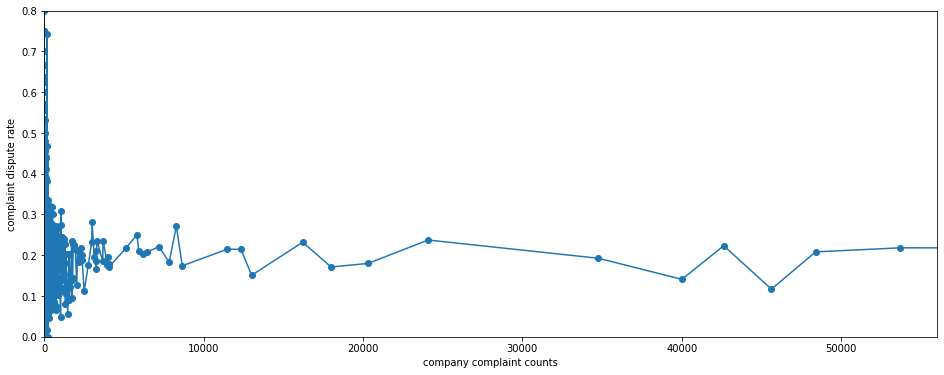

In [80]:
fig = plt.figure(figsize=(16,6))
plt.plot(company['complaint_counts'],company['dispute_rate'],marker='o')
plt.xlim([0.0, 56000])
plt.ylim([0.0, 0.8])
plt.xlabel('company complaint counts')
plt.ylabel('complaint dispute rate')
plt.title('')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 18})

plt.show()
fig.savefig('disputerate_complaintcount.png')

In [81]:
temp= pd.crosstab(df['Product'], df['Consumer disputed?'])

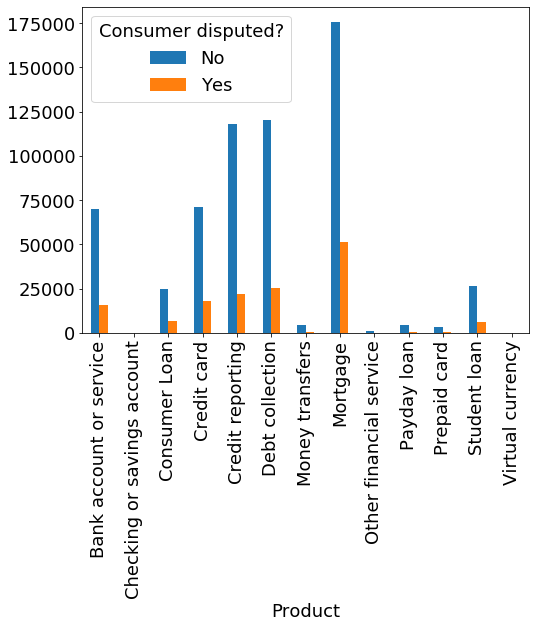

In [82]:
temp.plot(kind='bar',figsize=(8,6))## The disputed percentages are about same between 
###Consent and Consent Not "complaint narrative text".

In [83]:
temp1= pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])

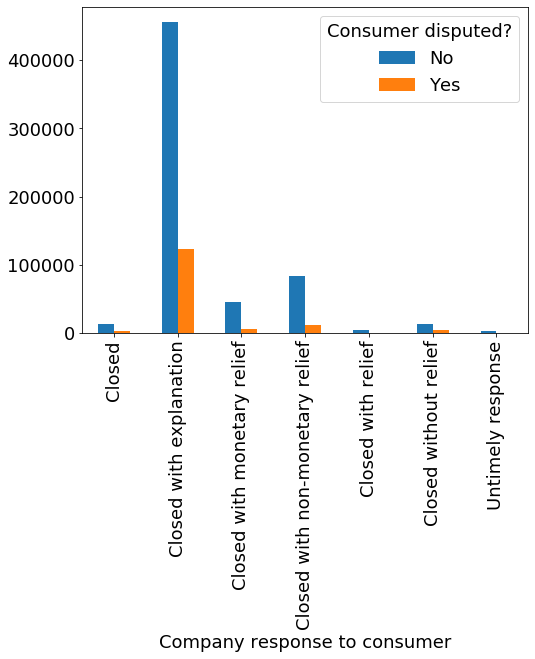

In [84]:
temp1.plot(kind='bar',figsize=(8,6)) ###Most cases are fall in closed with explaination

In [85]:
temp3= pd.crosstab(df['Product'], df['Consumer disputed?'])

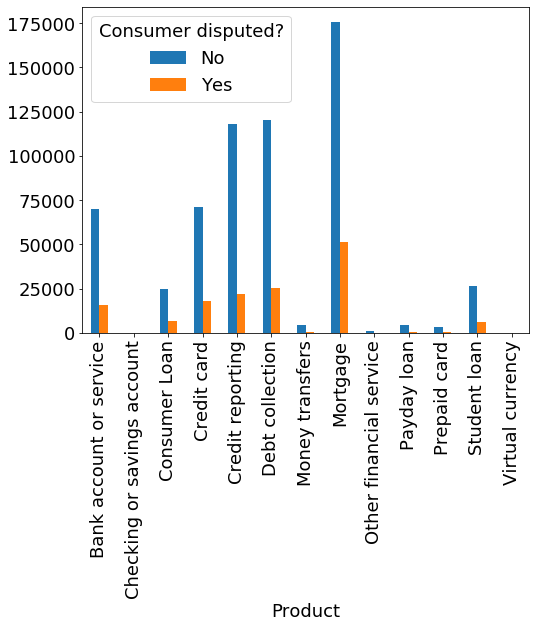

In [86]:
temp3.plot(kind='bar',figsize=(8,6))

In [87]:
df['State'].value_counts().shape

(62,)

In [88]:
df['Date received']= pd.to_datetime(df['Date received'])
df['Date sent to company']= pd.to_datetime(df['Date sent to company']) 

In [89]:
df[df['Date received']!=df['Date sent to company']].shape

(399563, 19)

In [90]:
df[pd.isnull(df['Issue'])]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,company_complaint_counts


In [91]:
df['Sub-product'].fillna('Not Provided',inplace=True)
df['Sub-issue'].fillna('Not Provided',inplace=True)
df['Consumer complaint narrative'].fillna('None or Not Provided',inplace=True)
###Combine "company public missing value" with "Company chose not to provide"
df['Company public response'].fillna('Company chooses not to provide',inplace=True) 

###Combine missing value of "Issue" with "Other"
df['Issue'].fillna('Other',inplace=True) 

### Replace missing vlaues of 'Tags' with "'Unknown'
df['Tags'].fillna('Unknown',inplace=True) 

### Replace missing vlaues of 'Submitted via' with "'other'
df['Submitted via'].fillna('Other',inplace=True) 

###Combine missing value,other,and withdrawn of "Consumer consent provided? " 
###with Consumer consent not provided, since only users's complaints narrative will be provided
### with the type of Consumer consent provided
df['Consumer consent provided?'].fillna('Consent not provided',inplace=True) 
df['Consumer consent provided?']=df['Consumer consent provided?'].apply(lambda x: 
            'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)

In [92]:
### Fill missing 'State' info using valide zipcode.
from pyzipcode import ZipCodeDatabase
zip=ZipCodeDatabase()
for i in df[pd.isnull(df['State'])&pd.notnull(df['ZIP code'])].index:
    try:
        df['State'][i]=str(zip[df['ZIP code'][i]].state)
    except:
        continue

C:\Users\puj83\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
df[pd.isnull(df['State'])&pd.isnull(df['ZIP code'])].shape ###Still 4268 users has no state info

(5636, 19)

In [94]:
df['State'].fillna('Not provided',inplace=True)
df['ZIP code'].fillna('Not Provided',inplace=True)

In [95]:
df['Consumer consent provided?'].value_counts(dropna=False)

Consent not provided    604383
Consent provided        164094
Name: Consumer consent provided?, dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768477 entries, 175 to 1650533
Data columns (total 19 columns):
Date received                   768477 non-null datetime64[ns]
Product                         768477 non-null object
Sub-product                     768477 non-null object
Issue                           768477 non-null object
Sub-issue                       768477 non-null object
Consumer complaint narrative    768477 non-null object
Company public response         768477 non-null object
Company                         768477 non-null object
State                           768477 non-null object
ZIP code                        768477 non-null object
Tags                            768477 non-null object
Consumer consent provided?      768477 non-null object
Submitted via                   768477 non-null object
Date sent to company            768477 non-null datetime64[ns]
Company response to consumer    768477 non-null object
Timely response?                768477 non-nu

In [97]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,company_complaint_counts
175,2016-07-13,Debt collection,I do not know,Disclosure verification of debt,Right to dispute notice not received,"I monitor my credit report, more frequently no...",Company chooses not to provide,Midwest Recovery Systems,VA,Not Provided,Servicemember,Consent provided,Web,2016-07-13,Closed with explanation,No,Yes,2010655,363
256,2017-04-13,Credit card,Not Provided,Other,Not Provided,I was stupid enough to charge some items at MA...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NC,286XX,Unknown,Consent provided,Web,2017-04-13,Closed with monetary relief,Yes,No,2432795,34768
289,2016-06-29,Debt collection,Credit card,Taking/threatening an illegal action,Threatened to sue on too old debt,"XXXX/XXXX/XXXX I received a letter from ARA, I...",Company chooses not to provide,"Financial Credit Service, Inc.",TX,Not Provided,Unknown,Consent provided,Web,2016-06-30,Closed with explanation,No,No,1991793,423
407,2015-05-20,Debt collection,Payday loan,Communication tactics,Called after sent written cease of comm,I had my vehicle repoed & I had to use XXXX pa...,Company believes complaint represents an oppor...,"Chek Cash, Inc.",TX,770XX,Unknown,Consent provided,Web,2015-07-02,Closed with explanation,Yes,No,1384427,3
556,2016-01-15,Bank account or service,Savings account,Deposits and withdrawals,Not Provided,None or Not Provided,Company chooses not to provide,FIRSTBANK PUERTO RICO,PR,00682,Unknown,Consent not provided,Web,2016-01-21,Closed with explanation,Yes,No,1744283,209


In [98]:
df.groupby(df['Consumer disputed?'])['Date received']

In [99]:
temp5 = pd.crosstab(df['Consumer consent provided?'], df['Consumer disputed?'])

In [100]:
df['Consumer consent provided?'].value_counts()

Consent not provided    604383
Consent provided        164094
Name: Consumer consent provided?, dtype: int64

In [101]:
replace={'Yes':True, 'No':False}

In [102]:
df['Consumer disputed?']= df['Consumer disputed?'].apply(lambda x: replace[x])

In [103]:
#Create a dataframe including all the features in the model
df_model = DataFrame()

In [104]:
#Create 'consent provided' Boolean feature
replace1={'Consent provided':True, 'Consent not provided':False}
df_model['Consumer consent provided?']= df['Consumer consent provided?'].apply(lambda x: replace1[x])

In [105]:
#Create the number of compliants of each company as a feature
company_complaitns_counts = df['Company'].value_counts()
df_model['company_complaint_counts'] = df['Company'].apply(lambda x: company_complaitns_counts[x])

In [106]:
feature_for_model=['Product', 'Sub-product','Issue','Sub-issue', 'Company public response','Tags',
                'Company response to consumer', 'State']
for name in feature_for_model:
    repl={}
    i=0
    for value in df[name].unique():
        repl[value] = i
        i+=1
       
    df[name] = df[name].apply(lambda x: repl[x])
    df_model[name] = df[name].astype('category')

In [107]:
##process time refers to days between the date CFPB received complaitns and the date 
##when complaints were sent to company on behal of comsume
df['Process time']=(df['Date sent to company']-df['Date received']).astype('timedelta64[D]').astype(int)
df_model=pd.concat([df_model,df['Process time']],axis=1)

In [108]:
#Create 'Timely response" boolean feature
df['Timely response?'] = df['Timely response?'].apply(lambda x: replace[x])
df_model=pd.concat([df_model,df['Timely response?']],axis=1)

In [109]:
##Create features about complaint submitted time
df_model['Date_received_year'] = df['Date received'].apply(lambda x: x.year)
df_model['Date_received_month'] = df['Date received'].apply(lambda x: x.month)
df_model['Date_received_day'] = df['Date received'].apply(lambda x: x.day)

In [110]:
df_model.head().T

,175,256,289,407,556
Consumer consent provided?,True,True,True,True,False
company_complaint_counts,363,34768,423,3,209
Product,0,1,0,0,2
Sub-product,0,1,2,3,4
Issue,0,1,2,3,4
Sub-issue,0,1,2,3,1
Company public response,0,1,0,2,0
Tags,0,1,1,1,1
Company response to consumer,0,1,0,0,0
State,0,1,2,2,3


In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
from sklearn.pipeline import Pipeline
from scipy import interp
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [112]:
X = df_model.values
y = df['Consumer disputed?'].values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [127]:
X_train

array([[False, 53693, 2, ..., 2016, 7, 29],
       [False, 227, 4, ..., 2012, 8, 20],
       [False, 8666, 4, ..., 2015, 12, 3],
       ...,
       [False, 45622, 6, ..., 2014, 11, 4],
       [True, 42630, 2, ..., 2016, 7, 1],
       [False, 2052, 0, ..., 2017, 2, 6]], dtype=object)

In [128]:
X_test

array([[False, 5946, 3, ..., 2012, 5, 2],
       [True, 65992, 4, ..., 2016, 6, 8],
       [False, 40006, 6, ..., 2016, 8, 26],
       ...,
       [False, 13020, 1, ..., 2016, 5, 31],
       [False, 16222, 4, ..., 2014, 5, 12],
       [False, 5946, 2, ..., 2012, 12, 7]], dtype=object)

In [129]:
y_train

array([False, False, False, ..., False, False, False])

In [130]:
y_test

array([ True, False, False, ..., False,  True, False])

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(v_probs, y_test, title, xlabel, ylabel):
    # ROC
    fig = plt.figure(figsize = (8,6))
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)
    
    import sklearn.metrics as skm
    auc = skm.roc_auc_score(y_test, v_probs)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, 'k--')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()
    fig.savefig(title+'.png')

In [143]:
## Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1, class_weight='balanced', max_features=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [144]:
rfc.score(X_test, y_test)

0.7956290339371226

In [145]:
pd.crosstab(y_test, rfc.predict(X_test))

col_0,False,True
row_0,,
False,120503,3834
True,27577,1782


In [146]:
skm.roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

0.5855751872953389

In [147]:
skm.recall_score(y_test, rfc.predict(X_test))

0.06069689022105657

[[120503   3834]
 [ 27577   1782]]


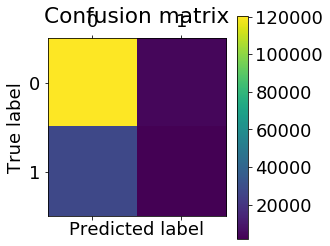

In [148]:
plot_confusion_matrix(rfc, X_test, y_test)

In [149]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

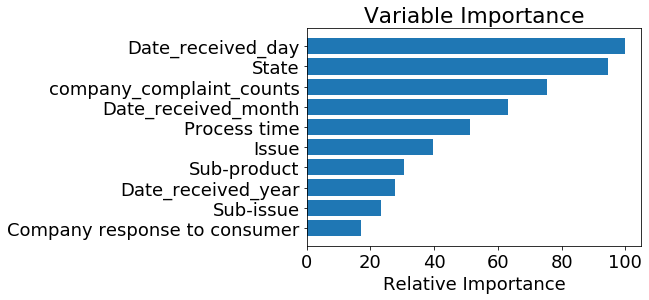

In [150]:
plot_importance(rfc, df_model, max_features=10)

In [151]:
#Create features about 'Consumenr complaint narrative'

from string import punctuation, ascii_letters

def process_text_field(text):
    '''
    text: string
    OUTPUT: int, int, int, float (length, word count, uppercase_count_rate, punctuation_rate)
    '''
    length = len(text)
    word_count = 0
    last_char = False
    for c in text:
        if c in ascii_letters:
            if last_char==False:
                word_count += 1
                last_char=True
        else:
            last_char = False
    
    punct_count = 0
    uppercase_count = 0
    for c in text:
        if c in punctuation:
            punct_count += 1
        if c.isupper():
            uppercase_count += 1
    punctuation_rate = punct_count / float(length+1)
    uppercase_count_rate = uppercase_count / float(length+1)
    
    return length, word_count, uppercase_count_rate, punctuation_rate

def process_text_column(df, fieldname):
    length_list = []
    word_count_list = []
    punctuation_rate_list = []
    uppercase_count_rate_list=[]
    for row_ix in df.index:
        length, word_count, uppercase_count_rate, punctuation_rate = process_text_field(df[fieldname][row_ix])
        length_list.append(length)
        word_count_list.append(word_count)
        uppercase_count_rate_list.append(uppercase_count_rate)
        punctuation_rate_list.append(punctuation_rate)
    return length_list, word_count_list, uppercase_count_rate_list, punctuation_rate_list

In [152]:
stemmer = SnowballStemmer("english")

def stem_tokens(tokens, stemmer):
    stemmed=[]
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [153]:
df=df[df['Consumer complaint narrative']!= 'None or Not Provided']

In [155]:
X_word = df['Consumer complaint narrative'].values
y = df['Consumer disputed?'].values

In [156]:
X_word.shape

(164066,)

In [157]:
X_train_word, X_test_word, y_train, y_test = train_test_split(X_word, y, test_size=0.20, random_state=67)
vectorizer = TfidfVectorizer(stop_words='english',lowercase=False, min_df=0.001, max_df = 0.2,
                             )
words_matrix_train = vectorizer.fit_transform(X_train_word)
words_matrix_test = vectorizer.transform(X_test_word)
words_matrix = vectorizer.transform(X_word)

In [158]:
words_matrix.shape

(164066, 5108)

In [159]:
#MultinomialNB classifier directly using tfidf text

model = MultinomialNB()
model.fit(words_matrix_train, y_train)

##Model evaluation via 'Consumer complaint narrative' only

model.score(words_matrix_test,y_test)
skm.roc_auc_score(y_test, model.predict_proba(words_matrix_test)[:, 1])

0.6121915943963939

In [161]:
# random forest directly using tfidf
rfc = RandomForestClassifier(n_estimators=1, n_jobs=-1, class_weight='balanced' )
rfc.fit(words_matrix_train, y_train)
skm.roc_auc_score(y_test, rfc.predict_proba(words_matrix_test)[:, 1])

0.5375460203991602

In [ ]:
#plot_importance(rfc, words_matrix, max_features=10)

In [162]:
y_test.shape

(32814,)

In [163]:
v_prob = rfc.predict_proba(words_matrix_test)[:, 1]

In [164]:
v_prob.shape

(32814,)

In [166]:
features = np.array(vectorizer.get_feature_names())

In [167]:
type(features)

numpy.ndarray

In [168]:
table = DataFrame(words_matrix.toarray(), columns = features)

In [169]:
table.head()

,000,10,100,1000,10000,100000,11,110,1100,11000,...,yearly,years,yelled,yelling,yes,yesterday,young,yr,yrs,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.14239,0.138678,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.10595,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0


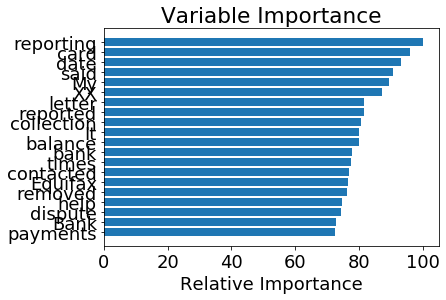

In [170]:
plot_importance(rfc, table, max_features=20)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 12})

In [171]:
from sklearn.linear_model import SGDClassifier

In [172]:
sgd = SGDClassifier(loss= 'log')

In [173]:
sgd.fit(words_matrix_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [174]:
skm.roc_auc_score(y_test, sgd.predict_proba(words_matrix_test)[:, 1])

0.6334025572042346

In [176]:
#prediction according to threshold value.
def model_predict(probs, threshold):
    pred = []
    for prob in probs:
        if prob>=threshold:
            pred.append(1)
        else: pred.append(0)
    return np.array(pred)

In [177]:
probs = sgd.predict_proba(words_matrix_test)[:, 1]

In [178]:
probs.shape

(32814,)

In [179]:
predict = np.array(model_predict(probs, 0.2))

In [180]:
len(predict)

32814

In [181]:
pd.crosstab(y_test,predict)

col_0,0,1
row_0,,
False,12832,12752
True,2301,4929


In [182]:
def plot_curve(probabilities, labels, title):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []
    fnrs = []
    accus = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases
   

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        predicted = np.array([1 if i >= threshold else 0 for i in probabilities])
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)
        # Calculate the False Negative Rate
        fnr = 1 - tpr
        # Calculate the overall accuracy
        accu = float(np.sum(predicted==labels))/len(labels)

        fprs.append(fpr)
        tprs.append(tpr)
        fnrs.append(fnr)
        accus.append(accu)
        
    fig = plt.figure(figsize=(8,6))   
    plt.xlim([np.min(probabilities), np.max(probabilities)])
    plt.ylim([0.0, 1.05])
    plt.plot(thresholds.tolist(),fprs,  label = 'false positive rate')
    plt.plot(thresholds.tolist(),fnrs, label = 'false negative rate')
    plt.plot(thresholds.tolist(),accus, label = 'overall accuracy')
    plt.plot(np.repeat([0.228],100), np.linspace(0,1.05,100), 'k--', label = 'selected threshold')
    plt.legend(loc="lower right")
    plt.title(title)
    plt.show()
    fig.savefig('threshold_select.png')

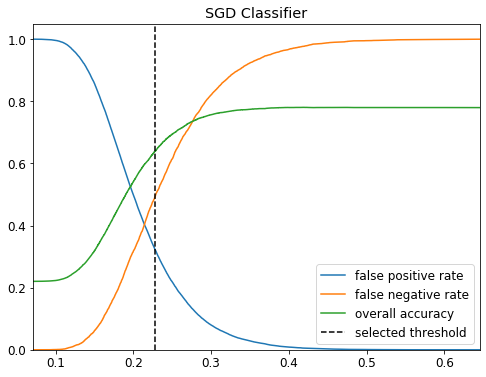

In [183]:
plot_curve(probs, y_test, 'SGD Classifier')